Accuracy: 0.8

Confusion Matrix:
 [[31  0]
 [12 17]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.72      1.00      0.84        31
         1.0       1.00      0.59      0.74        29

    accuracy                           0.80        60
   macro avg       0.86      0.79      0.79        60
weighted avg       0.86      0.80      0.79        60



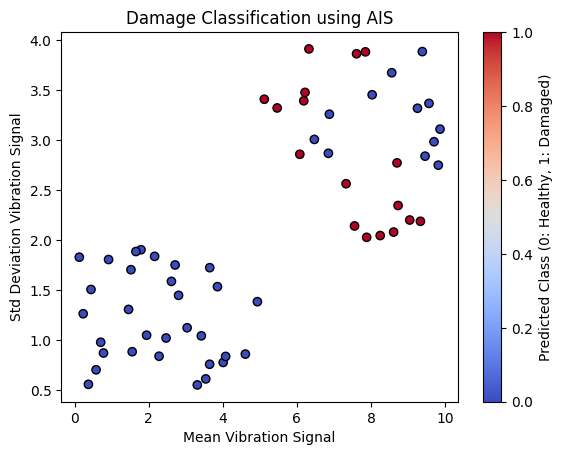

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 1. Simulate Experimental Data
# Let's create simple vibration signals (features: mean and standard deviation)
np.random.seed(42)

def generate_data(n_samples, damage=False):
    if damage:
        # Damaged structures have higher mean and std deviation
        mean = np.random.uniform(5, 10, n_samples)
        std = np.random.uniform(2, 4, n_samples)
    else:
        # Healthy structures
        mean = np.random.uniform(0, 5, n_samples)
        std = np.random.uniform(0.5, 2, n_samples)
    
    return np.column_stack((mean, std))

n_samples = 100
healthy_data = generate_data(n_samples, damage=False)
damaged_data = generate_data(n_samples, damage=True)

# Labels
healthy_labels = np.zeros(n_samples)
damaged_labels = np.ones(n_samples)

# Combine
X = np.vstack((healthy_data, damaged_data))
y = np.hstack((healthy_labels, damaged_labels))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Artificial Immune System - Simple Negative Selection Classifier
class AISClassifier:
    def __init__(self, num_detectors=50, threshold=1.0):
        self.num_detectors = num_detectors
        self.threshold = threshold
        self.detectors = []
    
    def train(self, self_data):
        # Generate random detectors that DO NOT match self (healthy) data
        count = 0
        attempts = 0
        while count < self.num_detectors and attempts < 10000:
            candidate = np.random.uniform(0, 12, 2)  # Random point in feature space
            if all(np.linalg.norm(candidate - x) > self.threshold for x in self_data):
                self.detectors.append(candidate)
                count += 1
            attempts += 1
        self.detectors = np.array(self.detectors)
    
    def predict(self, data):
        preds = []
        for x in data:
            match = any(np.linalg.norm(x - d) < self.threshold for d in self.detectors)
            preds.append(1 if match else 0)  # 1: damaged, 0: healthy
        return np.array(preds)

# Initialize and train AIS
ais = AISClassifier(num_detectors=50, threshold=1.5)
ais.train(X_train[y_train == 0])  # Train only on healthy data (self)

# Test AIS
y_pred = ais.predict(X_test)

# 3. Evaluate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 4. Visualization
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred, cmap='coolwarm', edgecolors='k')
plt.title('Damage Classification using AIS')
plt.xlabel('Mean Vibration Signal')
plt.ylabel('Std Deviation Vibration Signal')
plt.colorbar(label='Predicted Class (0: Healthy, 1: Damaged)')
plt.show()


What this code does:
Simulates vibration data for healthy and damaged structures.

Trains an AIS-based negative selection classifier to recognize "non-self" (damaged) patterns.

Tests and evaluates performance with a confusion matrix, accuracy, and classification report.

Visualizes the results.

Quick Summary of AIS Concept Here:
Self = healthy data (normal structure behavior).

Non-self = damaged data (anomalous behavior).

Detectors = randomly generated and only kept if they don't match self data.

Prediction = if a new sample matches a detector → classify as damaged.

